In [ ]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [60]:
# 📦 Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np



In [1]:
import pandas as pd
def load_data(filepath=r'ChildProtection_UNICEF.csv'):
    """Load dataset with correct encoding."""
    df = pd.read_csv(filepath, encoding='latin1')
    print(" Dataset loaded successfully.")
    return df



In [2]:

df = load_data()
def clean_data(df):
    # Drop columns with too many missing values
    threshold = len(df) * 0.5
    df = df.dropna(thresh=threshold, axis=1)
    
    # Fill remaining missing values
    df = df.fillna("Unknown")
    
    # Strip column names and standardize 'Country' and 'Year'
    df.columns = df.columns.str.strip()
    if 'Country' in df.columns:
        df['Country'] = df['Country'].astype(str).str.strip().str.title()
    if 'Year' in df.columns:
        df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

    return df

clean_data(df)

 Dataset loaded successfully.


,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,AGE:Current age,EDUCATION_LEVEL:Education Level,WEALTH_QUINTILE:Wealth Quintile,RESIDENCE:Residence,NUMBER_CHLD:Number of Living Children,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MEASURE:Unit of measure,SERIES_FOOTNOTE:Series footnote,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,DATA_SOURCE:Data Source,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,COVERAGE_TIME:The period of time for which data are provided,FREQ_COLL:Time interval at which the source data are collected
0,UNICEF:PT(1.0): Child Protection,AGO: Angola,PT_ADLS_10-14_LBR_HC: Percentage of adolescent...,M: Male,Y10T14: 10 to 14 years old,_T: Total,_T: Total,_T: Total,_T: Total,2016,15.4,PCNT: %,"While trend data are available, changes in the...",RA: Reanalysed,F: Free,DHS 2015-16,EOF: End of fieldwork,2015-16,0: Not Known
1,UNICEF:PT(1.0): Child Protection,AGO: Angola,PT_ADLS_10-14_LBR_HC: Percentage of adolescent...,F: Female,Y10T14: 10 to 14 years old,_T: Total,_T: Total,_T: Total,_T: Total,2016,19.3,PCNT: %,"While trend data are available, changes in the...",RA: Reanalysed,F: Free,DHS 2015-16,EOF: End of fieldwork,2015-16,0: Not Known
2,UNICEF:PT(1.0): Child Protection,BDI: Burundi,PT_ADLS_10-14_LBR_HC: Percentage of adolescent...,_T: Total,Y10T14: 10 to 14 years old,_T: Total,_T: Total,_T: Total,_T: Total,2017,25.5,PCNT: %,"While trend data are available, changes in the...",RA: Reanalysed,F: Free,DHS 2016-17,EOF: End of fieldwork,2016-17,0: Not Known
3,UNICEF:PT(1.0): Child Protection,BDI: Burundi,PT_ADLS_10-14_LBR_HC: Percentage of adolescent...,M: Male,Y10T14: 10 to 14 years old,_T: Total,_T: Total,_T: Total,_T: Total,2017,20.5,PCNT: %,"While trend data are available, changes in the...",RA: Reanalysed,F: Free,DHS 2016-17,EOF: End of fieldwork,2016-17,0: Not Known
4,UNICEF:PT(1.0): Child Protection,BDI: Burundi,PT_ADLS_10-14_LBR_HC: Percentage of adolescent...,F: Female,Y10T14: 10 to 14 years old,_T: Total,_T: Total,_T: Total,_T: Total,2017,30.0,PCNT: %,"While trend data are available, changes in the...",RA: Reanalysed,F: Free,DHS 2016-17,EOF: End of fieldwork,2016-17,0: Not Known
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,UNICEF:PT(1.0): Child Protection,WSM: Samoa,PT_ST_13-15_BUL_30-DYS: Percentage of students...,_T: Total,Y13T17: 13 to 17 years old,_T: Total,_T: Total,_T: Total,_T: Total,2017,36.6,PCNT: %,Work is underway to populate the UNICEF global...,RP: Reported,F: Free,GSHS 2017,EOF: End of fieldwork,2017,0: Not Known
4076,UNICEF:PT(1.0): Child Protection,WSM: Samoa,PT_ST_13-15_BUL_30-DYS: Percentage of students...,M: Male,Y13T15: 13 to 15 years,_T: Total,_T: Total,_T: Total,_T: Total,2017,43.0,PCNT: %,Work is underway to populate the UNICEF global...,RP: Reported,F: Free,GSHS 2017,EOF: End of fieldwork,2017,0: Not Known
4077,UNICEF:PT(1.0): Child Protection,WSM: Samoa,PT_ST_13-15_BUL_30-DYS: Percentage of students...,F: Female,Y13T15: 13 to 15 years,_T: Total,_T: Total,_T: Total,_T: Total,2017,33.9,PCNT: %,Work is underway to populate the UNICEF global...,RP: Reported,F: Free,GSHS 2017,EOF: End of fieldwork,2017,0: Not Known
4078,UNICEF:PT(1.0): Child Protection,WSM: Samoa,PT_ST_13-15_BUL_30-DYS: Percentage of students...,M: Male,Y13T17: 13 to 17 years old,_T: Total,_T: Total,_T: Total,_T: Total,2017,39.8,PCNT: %,Work is underway to populate the UNICEF global...,RP: Reported,F: Free,GSHS 2017,EOF: End of fieldwork,2017,0: Not Known


In [23]:
print("\n🧾 Column Names in Dataset:")
print(df.columns.tolist())



🧾 Column Names in Dataset:
['DATAFLOW', 'REF_AREA:Geographic area', 'INDICATOR:Indicator', 'SEX:Sex', 'AGE:Current age', 'EDUCATION_LEVEL:Education Level', 'WEALTH_QUINTILE:Wealth Quintile', 'RESIDENCE:Residence', 'NUMBER_CHLD:Number of Living Children', 'TIME_PERIOD:Time period', 'OBS_VALUE:Observation Value', 'UNIT_MEASURE:Unit of measure', 'SERIES_FOOTNOTE:Series footnote', 'OBS_STATUS:Observation Status', 'OBS_CONF:Observation confidentaility', 'DATA_SOURCE:Data Source', 'TIME_PERIOD_METHOD:Time period activity related to when the data are collected', 'COVERAGE_TIME:The period of time for which data are provided', 'FREQ_COLL:Time interval at which the source data are collected']


In [2]:
def perform_eda(df, numeric_column):
    """Generate basic statistics and visualizations."""
    print(" Descriptive Statistics:")
    print(df[numeric_column].describe())

    # Histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(df[numeric_column], bins=30, kde=True)
    plt.title("Distribution of Observation Values")
    plt.xlabel("Observation Value")
    plt.show()

    # Boxplot by Sex
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='SEX:Sex', y=numeric_column, data=df)
    plt.title("Boxplot of Observation Value by Sex")
    plt.show()


In [27]:
print("✅ Columns in your dataset:")
for col in df.columns:
    print(f"'{col}'")


✅ Columns in your dataset:
'DATAFLOW'
'REF_AREA:Geographic area'
'INDICATOR:Indicator'
'SEX:Sex'
'AGE:Current age'
'EDUCATION_LEVEL:Education Level'
'WEALTH_QUINTILE:Wealth Quintile'
'RESIDENCE:Residence'
'NUMBER_CHLD:Number of Living Children'
'TIME_PERIOD:Time period'
'OBS_VALUE:Observation Value'
'UNIT_MEASURE:Unit of measure'
'SERIES_FOOTNOTE:Series footnote'
'OBS_STATUS:Observation Status'
'OBS_CONF:Observation confidentaility'
'DATA_SOURCE:Data Source'
'TIME_PERIOD_METHOD:Time period activity related to when the data are collected'
'COVERAGE_TIME:The period of time for which data are provided'
'FREQ_COLL:Time interval at which the source data are collected'


In [31]:
# ✅ SHOW ALL COLUMN NAMES EXACTLY AS THEY APPEAR
print("📋 COLUMN NAMES IN DATAFRAME:")
for col in df.columns:
    print(f"'{col}'")


📋 COLUMN NAMES IN DATAFRAME:
'DATAFLOW'
'REF_AREA:Geographic area'
'INDICATOR:Indicator'
'SEX:Sex'
'AGE:Current age'
'EDUCATION_LEVEL:Education Level'
'WEALTH_QUINTILE:Wealth Quintile'
'RESIDENCE:Residence'
'NUMBER_CHLD:Number of Living Children'
'TIME_PERIOD:Time period'
'OBS_VALUE:Observation Value'
'UNIT_MEASURE:Unit of measure'
'SERIES_FOOTNOTE:Series footnote'
'OBS_STATUS:Observation Status'
'OBS_CONF:Observation confidentaility'
'DATA_SOURCE:Data Source'
'TIME_PERIOD_METHOD:Time period activity related to when the data are collected'
'COVERAGE_TIME:The period of time for which data are provided'
'FREQ_COLL:Time interval at which the source data are collected'


In [33]:
# Set the correct numeric column name
numeric_column = 'OBS_VALUE:Observation Value'

# Remove outliers using IQR
Q1 = df[numeric_column].quantile(0.25)
Q3 = df[numeric_column].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[(df[numeric_column] >= Q1 - 1.5 * IQR) & (df[numeric_column] <= Q3 + 1.5 * IQR)]

print("✅ Outliers removed successfully!")


✅ Outliers removed successfully!


In [51]:
# Save the cleaned dataset only (no clustering)
df.to_csv("Cleaned_ChildProtection_UNICEF.csv", index=False)

print("✅ Cleaned dataset saved as 'Cleaned_ChildProtection_UNICEF.csv'")



✅ Cleaned dataset saved as 'Cleaned_ChildProtection_UNICEF.csv'


In [ ]:
def perform_eda(df, numeric_column):
    """Generate basic statistics and visualizations."""
    print(" Descriptive Statistics:")
    print(df[numeric_column].describe())
# Describe numeric values
print(" Descriptive Statistics for 'OBS_VALUE'")
print(df['OBS_VALUE:Observation Value'].describe())

# Distribution of indicators
print("\n Number of records per Indicator:")
print(df['INDICATOR:Indicator'].value_counts())

# Optional: Group by indicator and get stats
print("\n Average OBS_VALUE per Indicator:")
print(df.groupby('INDICATOR:Indicator')['OBS_VALUE:Observation Value'].mean().sort_values(ascending=False))


📊 Descriptive Statistics for 'OBS_VALUE'
count    4080.000000
mean       42.344314
std        32.222108
min         0.000000
25%        12.400000
50%        36.200000
75%        69.300000
max       100.000000
Name: OBS_VALUE:Observation Value, dtype: float64

📌 Number of records per Indicator:
INDICATOR:Indicator
PT_F_15-49_W-BTNG: Percentage of women (aged 15-49 years) who consider a husband to be justified in hitting or beating his wife for at least one of the specified reasons    831
PT_CHLD_Y0T4_REG: Percentage of children under age 5 whose births are registered                                                                                             776
PT_ADLT_PS_NEC: Percentage of adults who think that physical punishment is necessary to raise/educate children                                                               632
PT_CHLD_1-14_PS-PSY-V_CGVR: Percentage of children (aged 1-14 years) who experienced any physical punishment and/or psychological aggression by caregivers

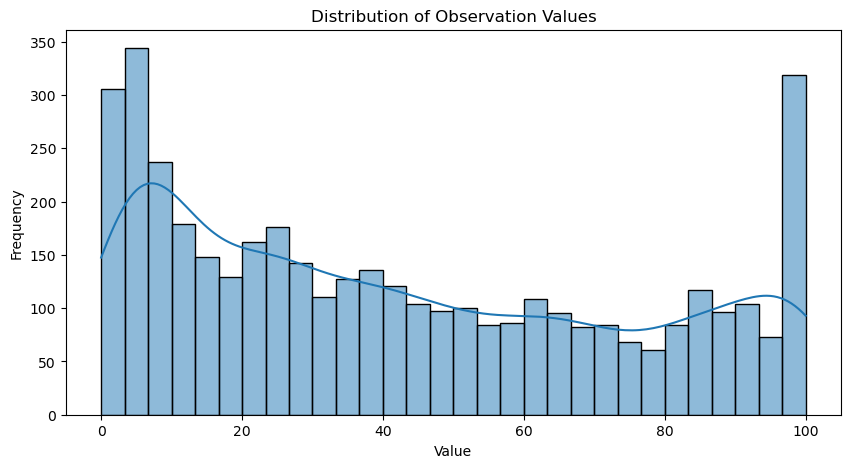

In [ ]:
# Histogram
def perform_eda(df, numeric_column):
    """Generate basic statistics and visualizations."""
    print(" Descriptive Statistics:")
    print(df[numeric_column].describe())
import matplotlib.pyplot as plt
import seaborn as sns
def perform_eda(df, numeric_column):
    """Generate basic statistics and visualizations."""
    print(" Descriptive Statistics:")
    print(df[numeric_column].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df['OBS_VALUE:Observation Value'], bins=30, kde=True)
plt.title("Distribution of Observation Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


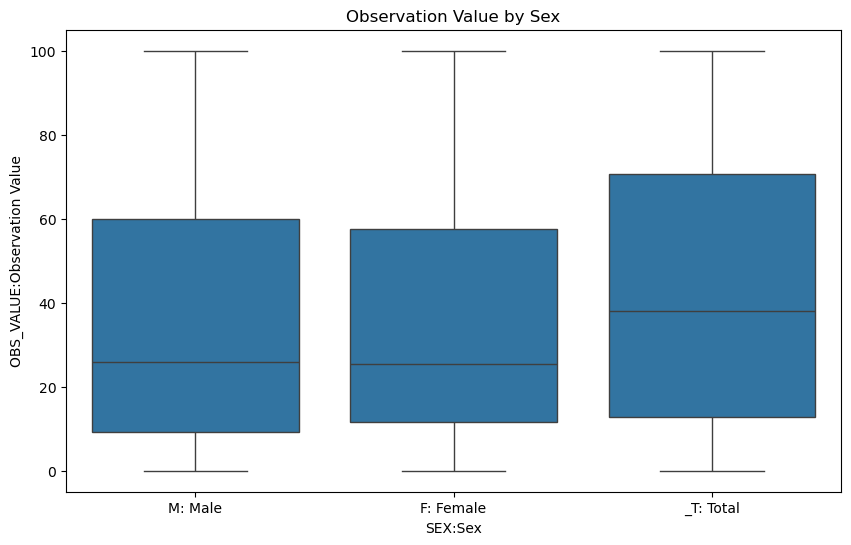

In [5]:
def perform_eda(df, numeric_column):
    """Generate basic statistics and visualizations."""
    print(" Descriptive Statistics:")
    print(df[numeric_column].describe())
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='SEX:Sex', y='OBS_VALUE:Observation Value', data=df)
plt.title("Observation Value by Sex")
plt.show()


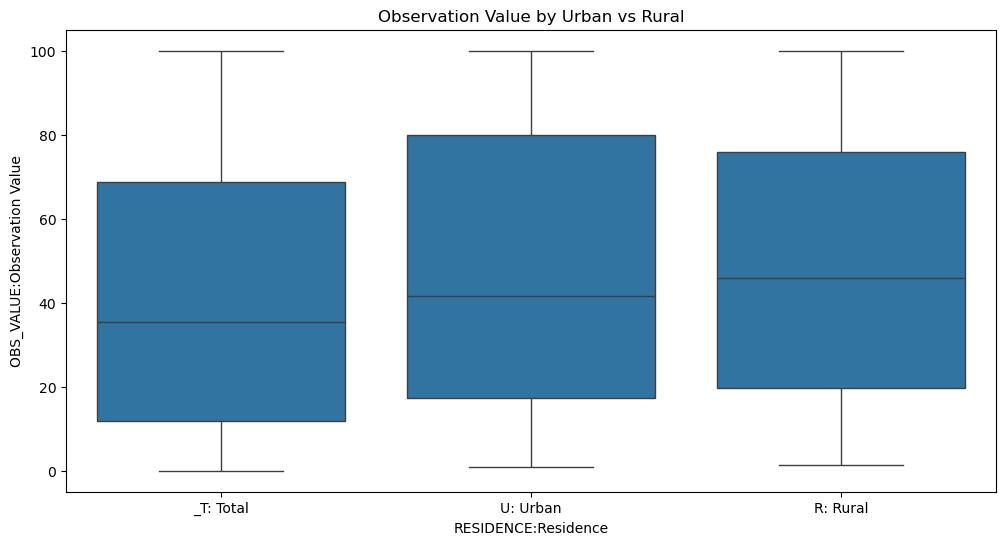

In [6]:
def perform_eda(df, numeric_column):
    """Generate basic statistics and visualizations."""
    print(" Descriptive Statistics:")
    print(df[numeric_column].describe())
#Residence, Wealth Quintile, or Education Level:
plt.figure(figsize=(12, 6))
sns.boxplot(x='RESIDENCE:Residence', y='OBS_VALUE:Observation Value', data=df)
plt.title("Observation Value by Urban vs Rural")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_3912\4248360951.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


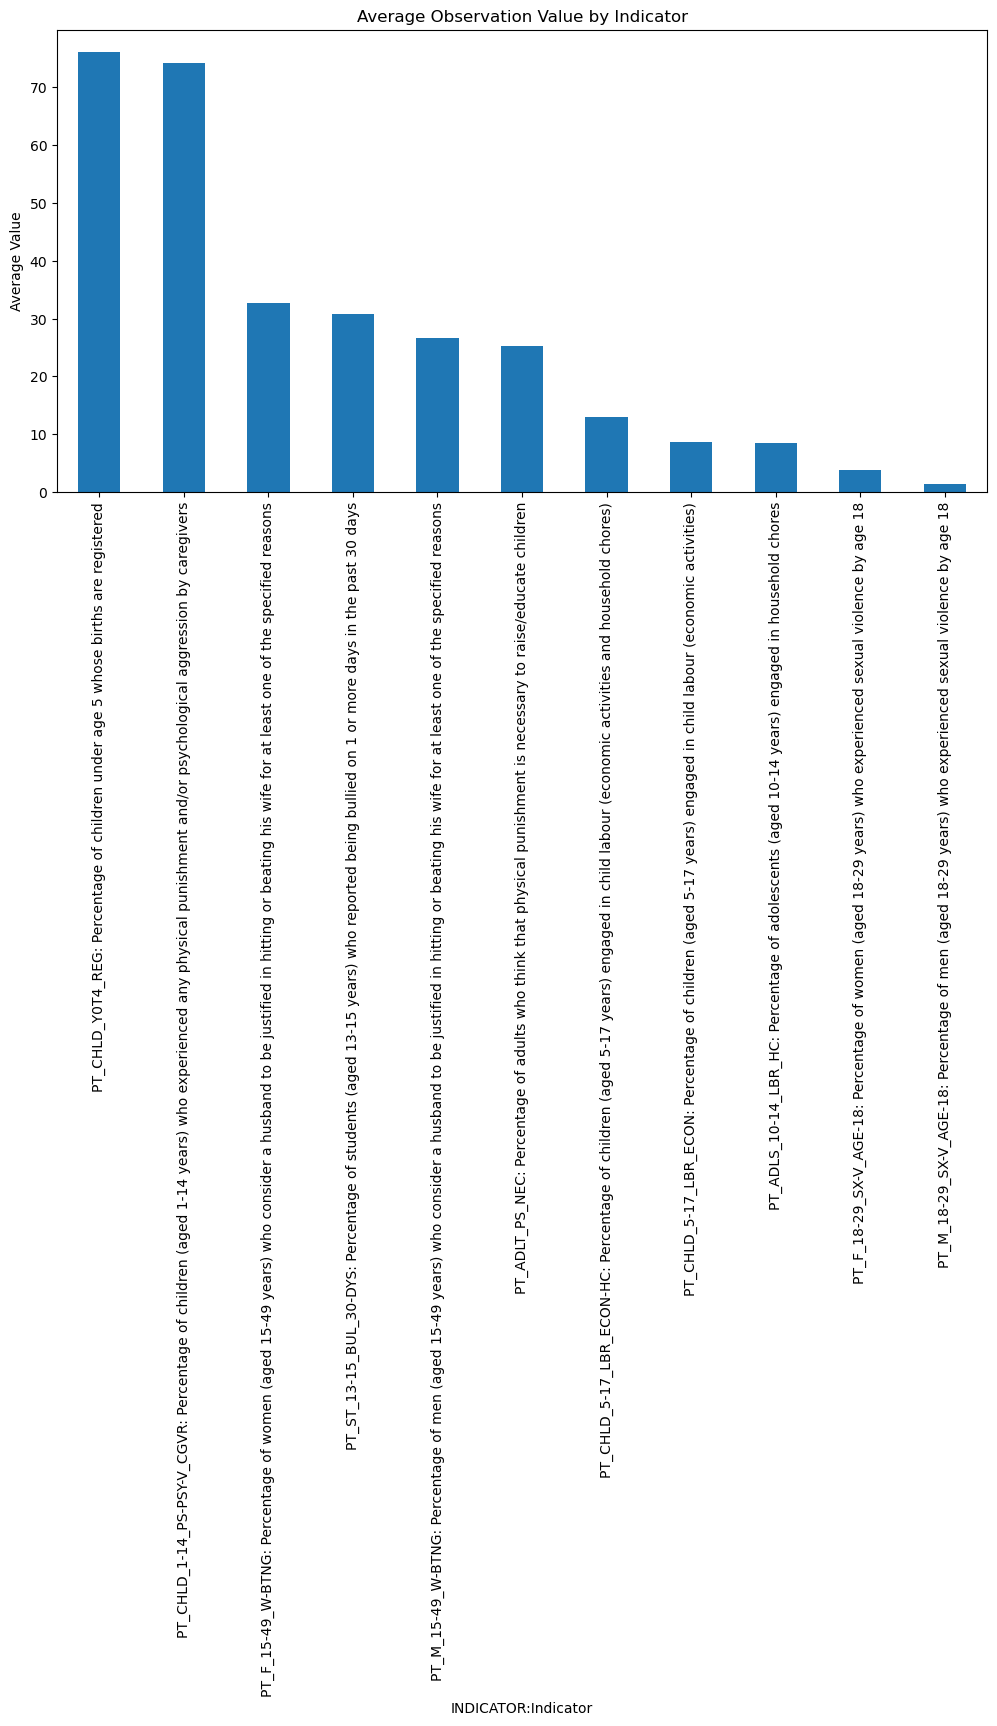

In [7]:
def perform_eda(df, numeric_column):
    """Generate basic statistics and visualizations."""
    print(" Descriptive Statistics:")
    print(df[numeric_column].describe())
#Bar Plot – mean values by indicator
indicator_stats = df.groupby('INDICATOR:Indicator')['OBS_VALUE:Observation Value'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
indicator_stats.plot(kind='bar')
plt.title("Average Observation Value by Indicator")
plt.ylabel("Average Value")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


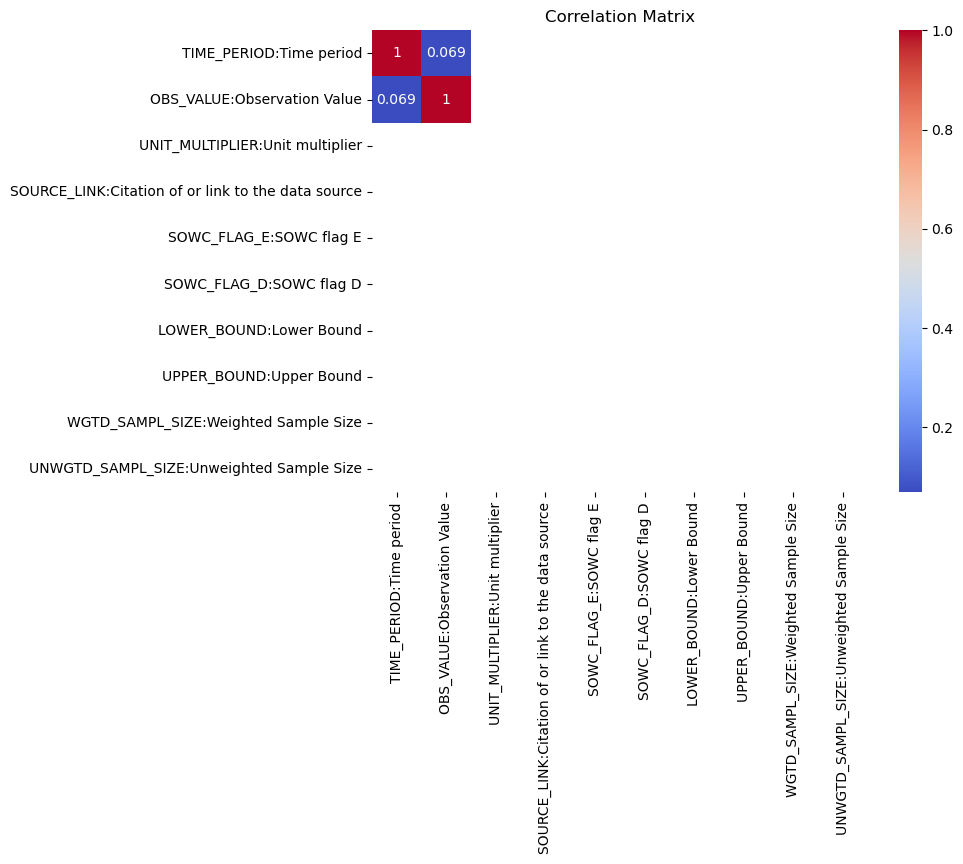

In [14]:
def perform_eda(df, numeric_column):

    print(" Descriptive Statistics:")
    print(df[numeric_column].describe())
#Heatmap (Optional) – correlation matrix (if you have multiple numeric columns)
# If there are other numeric columns after cleaning
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
✅ Unsupervised Machine Learning: Clustering
This fits your goal of:

“Mapping vulnerability: identifying high-risk areas for child protection interventions.”

✅ Why Clustering?
Your data does not have a label/target column (like "Risk Level = High/Low"), so classification/regression is not ideal.

Clustering will help group observations (e.g., by region, sex, age group) into similar vulnerability profiles.

In [15]:
def run_kmeans(df, features, k=3):
    """Apply KMeans clustering and return labeled data and feature matrix."""
    df_copy = df.copy()

    # Encode categorical features
    for col in features:
        if df_copy[col].dtype == 'object':
            df_copy[col] = LabelEncoder().fit_transform(df_copy[col].astype(str))

    # Scale
    scaler = StandardScaler()
    X = scaler.fit_transform(df_copy[features])

    # Train KMeans
    model = KMeans(n_clusters=k, random_state=42)
    df_copy['Cluster'] = model.fit_predict(X)

    return df_copy, X


In [59]:
# ...existing code...
from sklearn.preprocessing import LabelEncoder, StandardScaler
# ...existing code...

In [60]:
# ...existing code...

# Define the features you want to use for clustering
features = [
    'OBS_VALUE:Observation Value', 
    'SEX:Sex', 
    'RESIDENCE:Residence'
    # Add more relevant features if needed
]

# Prepare data and run KMeans
df_cluster, X = run_kmeans(df, features, k=3)

print("✅ Clustering complete!")
print(df_cluster[['Cluster'] + features].head())
# ...existing code...

✅ Clustering complete!
   Cluster  OBS_VALUE:Observation Value  SEX:Sex  RESIDENCE:Residence
0        2                         15.4        1                    2
1        2                         19.3        0                    2
2        0                         25.5        2                    2
3        2                         20.5        1                    2
4        2                         30.0        0                    2


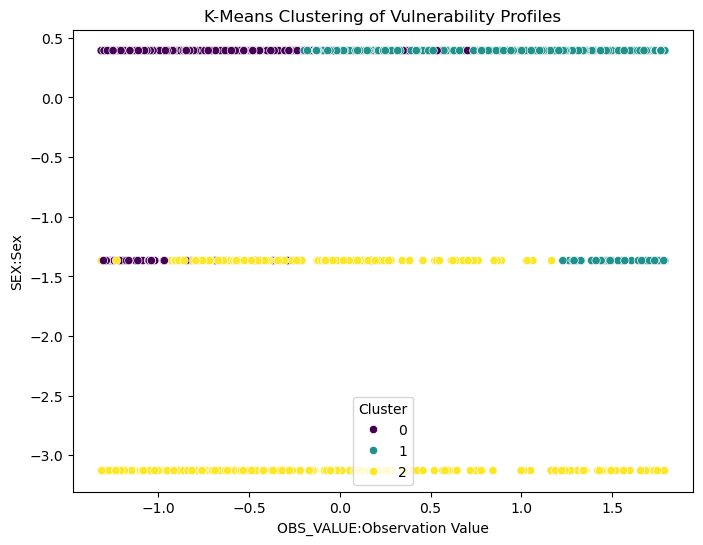

In [46]:
#Visualize the Clusters (Optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df_cluster['Cluster'], palette='viridis')
plt.title("K-Means Clustering of Vulnerability Profiles")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()


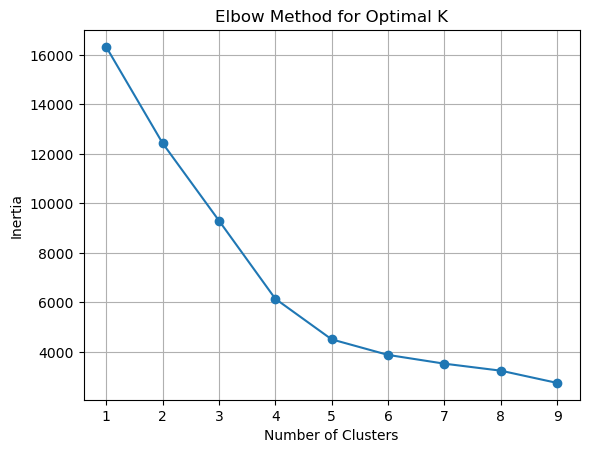

In [47]:
# Evaluate Optimal Number of Clusters (Elbow Method)
inertia = []
K = range(1, 10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)

plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [ ]:
# Compute Silhouette Score
#It measures how well each data point fits within its cluster — higher scores mean better clustering.

from sklearn.metrics import silhouette_score

# X is your scaled feature matrix
score = silhouette_score(X, df_cluster['Cluster'])

print(f" Silhouette Score for K-Means Clustering: {score:.3f}")


📈 Silhouette Score for K-Means Clustering: 0.340


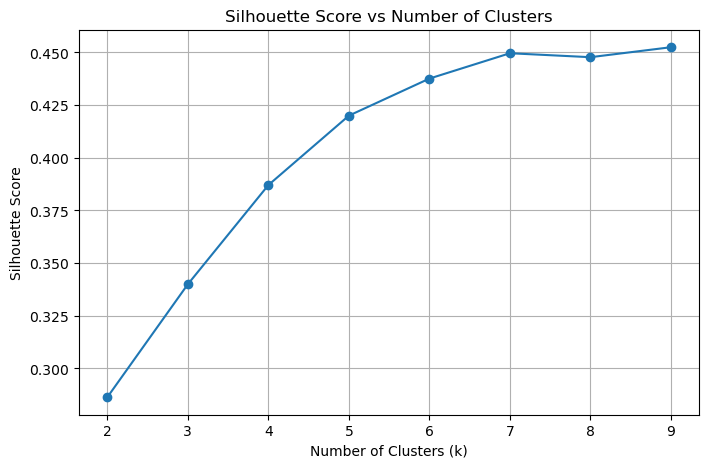

In [49]:
# Visualize Silhouette Score for Multiple k Values (Optional)
from sklearn.metrics import silhouette_score

scores = []
K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(K, scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()



In [ ]:
❓ What About Accuracy, Precision, RMSE?
These metrics are for supervised learning (like classification or regression) and require ground truth labels, which we don’t have in clustering. So, in your project:

✅ Silhouette Score is your best tool
❌ Accuracy / Precision / RMSE are not applicable